# Ajuste de curvas

* Regressão linear por mínimos quadrados
* Análise (erro-padrão, coeficiente de correlação)

# Motivação

Nesta seção veremos como analisar a qualidade de uma regressão linear.

Lembrando que temos um problema do tipo:

\begin{equation}
y = \theta_1x + \theta_0
\end{equation}

onde $x$ é a *variável independente ou preditora*, $y$ a *variável alvo ou dependente*, $\theta_1$ e $\theta_0$ são os parâmetros do modelo.

O resíduo é dado por:

\begin{equation}
e_i = y_i - y(x_i)
\end{equation}

a pergunta que precisamos responder é: 

<div class="alert alert-block alert-warning">
Quão bom é o modelo que escolhemos?
</div>

# Exemplo

Suponha que tenhamos os seguintes dados:

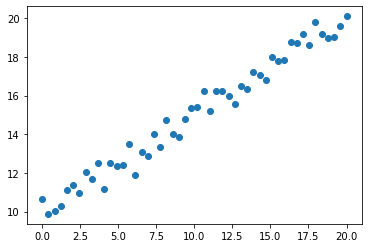

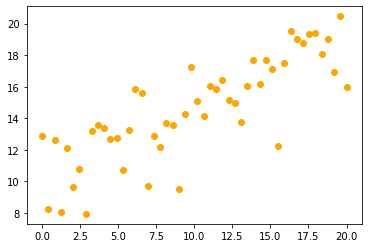

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np

theta1 = 0.5
theta0 = 10

X = np.linspace(0,20)
Y1 = [x * theta1 + theta0 + random.gauss(0, 0.5) for x in X ]
Y2 = [x * theta1 + theta0 + random.gauss(0, 2) for x in X ]

plt.scatter(X, Y1)
plt.figure()
plt.scatter(X, Y2, c='orange')

LinregressResult(slope=0.5022672662983104, intercept=9.992396631022547, rvalue=0.9874956401692124, pvalue=3.5737560691611177e-40, stderr=0.011573451429446638, intercept_stderr=0.13431880555287634) 
 LinregressResult(slope=0.4427070237423636, intercept=10.143733781250095, rvalue=0.8151618433322764, pvalue=5.760985862315452e-13, stderr=0.04540518422634501, intercept_stderr=0.5269620863205683)

Equação da reta 1: 0.5023x + 9.9924
Equação da reta 2: 0.4427x + 10.1437

Valor da métrica R2 para o segundo dataset: 0.9751476393532027
Valor da métrica R2 para o segundo dataset: 0.6644888308248746


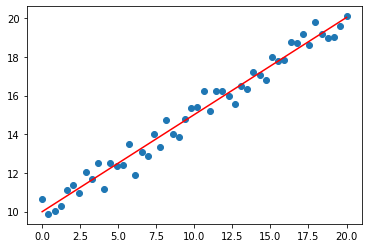

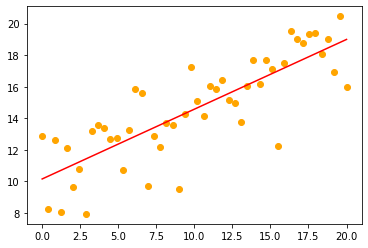

In [10]:
from scipy import stats

# regressao linear para o primeiro conjunto de pontos
res = stats.linregress(X, Y1)
m1_theta1, m1_theta0 = res.slope, res.intercept

# regressao linear para o segundo conjunto de pontos
res2 = stats.linregress(X, Y2)
m2_theta1, m2_theta0 = res2.slope, res2.intercept

# plotando os pontos originais e o modelo obtido
plt.scatter(X, Y1)
plt.plot(X, X*m1_theta1 + m1_theta0, 'r')

# plotando os pontos originais e o modelo obtido para o segundo conjunto de pontos
plt.figure()
plt.scatter(X, Y2, c='orange')
plt.plot(X, X*m2_theta1 + m2_theta0, 'r')

# imprimindo os resultados na tela
print(res, '\n', res2)
print(f'\nEquação da reta 1: {m1_theta1:.4f}x + {m1_theta0:.4f}\nEquação da reta 2: {m2_theta1:.4f}x + {m2_theta0:.4f}\n')

print(f'Valor da métrica R2 para o segundo dataset: {res.rvalue**2}')
print(f'Valor da métrica R2 para o segundo dataset: {res2.rvalue**2}')

## Coeficiente de determinação R-quadrado

Uma forma de avaliar o ajuste de um modelo linear é utilizando a métrica $R ^2$.

Ele é calculado a partir de duas somas:

\begin{equation}
SQtot = \sum\limits_{i=1}^n (y_i - \bar{y})^2
\end{equation}

e

\begin{equation}
SQexp = \sum\limits_{i=1}^n (\hat{y_i} - \bar{y})^2
\end{equation}

onde $\hat{y_i} = y(x_i)$ é o valor calculado pelo modelo.

A métrica $R^2$ é calculada como:

\begin{equation}
R^2 = \dfrac{SQexp}{SQtot}
\end{equation}


que também pode ser reescrita em termos da somatória dos resíduos como:

\begin{equation}
R^2 = \dfrac{SQtot - SQres}{SQtot}
\end{equation}


In [11]:
# soma total dos quadrados
Y1mean = np.mean(Y1)
SQtot = np.sum((Y1 - Y1mean)**2)

# soma dos quadrados dos resíduos
Y1hat = X*m1_theta1 + m1_theta0
SQres = np.sum((Y1 - Y1hat)**2)

# soma dos quadrados dos resíduos
Y1hat = X*m1_theta1 + m1_theta0
SQexp = np.sum((Y1hat - Y1mean)**2)

R2 = (SQtot - SQres)/SQtot
print(f'Valor da métrica R2 para o primeiro dataset: {R2}')

# soma total dos quadrados
Y2mean = np.mean(Y2)
SQtot = np.sum((Y2 - Y2mean)**2)

# soma dos quadrados dos resíduos
Y2hat = X*m2_theta1 + m2_theta0
SQres = np.sum((Y2 - Y2hat)**2)

R2 = (SQtot - SQres)/SQtot
print(f'Valor da métrica R2 para o segundo dataset: {R2}')

Valor da métrica R2 para o primeiro dataset: 0.975147639353203
Valor da métrica R2 para o segundo dataset: 0.6644888308248751


## Cálculo alternativo: Biblioteca statsmodels

In [5]:
import statsmodels.api as sm
import numpy as np

X1 = sm.add_constant(X)

mod1 = sm.OLS(Y1, X1).fit()
print(mod1.summary())

mod2 = sm.OLS(Y2, X1).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1468.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           1.20e-37
Time:                        21:05:27   Log-Likelihood:                -38.616
No. Observations:                  50   AIC:                             81.23
Df Residuals:                      48   BIC:                             85.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1349      0.149     68.032      0.0